<a href="https://colab.research.google.com/github/Schmiddle/CodeWeek/blob/main/Kopie_von_Kopie_von_first_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import xgboost as xgb 
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m nltk.downloader all


/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipp

In [ ]:
import nltk
from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

In [ ]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [ ]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))


0.76


In [ ]:
classifier.show_most_informative_features(5)


Most Informative Features
        contains(welles) = True              neg : pos    =      7.7 : 1.0
 contains(unimaginative) = True              neg : pos    =      7.7 : 1.0
     contains(atrocious) = True              neg : pos    =      7.1 : 1.0
          contains(mena) = True              neg : pos    =      7.1 : 1.0
        contains(suvari) = True              neg : pos    =      7.1 : 1.0


In [ ]:
#######

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/kaffee_reviews.csv', delimiter=',')

In [ ]:
df.head()

,Unnamed: 0,brand,rating,review
0,0,GEPA Kaffee,5,Wenn ich Bohnenkaffee trinke (auf Arbeit trink...
1,1,GEPA Kaffee,5,Für mich ist dieser Kaffee ideal. Die Grundvor...
2,2,GEPA Kaffee,5,Ich persönlich bin insbesondere von dem Geschm...
3,3,GEPA Kaffee,5,ganz abgesehen vom geschmack legt gepa inzwisc...
4,4,GEPA Kaffee,5,Seit Jahren kaufe ich am liebsten den Kaffee u...


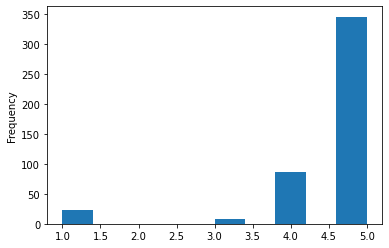

In [ ]:
df["rating"].plot.hist()

In [ ]:
df['sentiment'] = np.where(df['rating']>=4, 1, 0)

In [ ]:
train, test, y_train , y_test = train_test_split(df[['review']], df[['sentiment']], test_size = 0.3)

In [ ]:
from nltk import sent_tokenize, word_tokenize

In [ ]:
from nltk.corpus import stopwords
german_stop_words = stopwords.words('german')


LookupError: ignored

In [ ]:
def clean_text(df):
    import re
    corpus = []
    for i in range(0, df.shape[0]):        
        review = re.sub('[^A-Za-z0-9]'," ",df['review'].iloc[i])
        review = word_tokenize(review)        
        review = [word for word in review if word.lower() not in set(stopwords.words('german'))]
        review = ' '.join(review)
        corpus.append(review)
    
    return corpus

In [ ]:
train['review'].iloc[0]

'Sehr feiner mild gerösteter Kaffee,der auch wenig Säure hat und von uns daher sehr gut vertragen wird.Auch der Geschmack kommt nicht nur bei uns,sondern auch bei Gästen sehr gut an,wobei ich sagen muss,dass ich die ganzen Bohnen kaufe und immer passend mahle,daher wird auch das Aroma immer gelobt.Er ist in sehr vielen Supermärkten vorrätig,teilweise auch im Angebot,er hat aber auch ohne Angebot ein hervorragendes Preis-Leistungsverhältnis.'

In [ ]:
tr_corpus = clean_text(train)
te_corpus = clean_text(test)

In [ ]:
stopwords.words('german')

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [ ]:
cv =CountVectorizer(max_features=2000,ngram_range=(1,1),dtype=np.int8,stop_words=german_stop_words, analyzer='word')
X_cv = cv.fit_transform(tr_corpus).toarray()
X_test_cv = cv.transform(te_corpus).toarray()

In [ ]:
print('Vocabulary Size {}:'.format(len(cv.vocabulary_)))
print('Vocabulary Size {}:'.format(cv.vocabulary_))

Vocabulary Size 1322:
Vocabulary Size {'finde': 406, 'toll': 1123, 'mittlerweile': 819, 'viele': 1222, 'fair': 369, 'trade': 1131, 'produkte': 928, 'kaufen': 664, 'gibt': 511, 'kaffee': 631, 'schon': 1018, 'gut': 530, 'geschmeckt': 497, 'kologisch': 687, 'hergestellt': 560, 'wichtiger': 1279, 'geschmack': 490, 'lecker': 738, 'schmeckt': 1009, 'zahle': 1298, 'gerne': 485, 'relativ': 958, 'hohen': 592, 'preis': 916, 'lieblingskaffee': 754, 'limu': 759, 'einzige': 305, 'milch': 809, 'tasse': 1105, 'kommt': 693, 'espresso': 351, 'wunderbar': 1292, 'ueberhaupt': 1157, 'bitter': 193, 'gro': 526, 'fan': 381, 'weltpartner': 1267, 'kaffees': 650, 'lieblingssorte': 756, 'capuccino': 215, 'nder': 848, 'bio': 183, 'arabica': 64, 'mischung': 815, 'nicaragua': 864, 'peru': 910, 'kolumbien': 690, 'gehandelt': 448, 'faires': 374, 'leistungsverh': 746, 'ltnis': 770, 'kunde': 714, 'neue': 857, 'verpackung': 1205, 'bscher': 208, 'umweltfreundlicher': 1162, 'hnliche': 585, 'erfahrungen': 331, 'nicoh': 865

In [ ]:
cv.get_feature_names()

In [ ]:
tfidf = TfidfVectorizer(max_features=2000,dtype=np.float32,analyzer='word',
                        ngram_range=(1, 3),use_idf=True, smooth_idf=True, 
                        sublinear_tf=True)
X_tf = tfidf.fit_transform(tr_corpus).toarray()
X_test_tf = tfidf.fit_transform(te_corpus).toarray()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_cv, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.predict(X_test_cv)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
rf.predict_proba(X_test_cv)

array([[0.06833333, 0.93166667],
       [0.03166667, 0.96833333],
       [0.02      , 0.98      ],
       [0.08      , 0.92      ],
       [0.07      , 0.93      ],
       [0.06      , 0.94      ],
       [0.06      , 0.94      ],
       [0.14333333, 0.85666667],
       [0.02      , 0.98      ],
       [0.08      , 0.92      ],
       [0.04      , 0.96      ],
       [0.01      , 0.99      ],
       [0.09      , 0.91      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.01      , 0.99      ],
       [0.03      , 0.97      ],
       [0.01      , 0.99      ],
       [0.02      , 0.98      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.01      , 0.99      ],
       [0.11166667, 0.88833333],
       [0.        , 1.        ],
       [0.01      , 0.99      ],
       [0.07      , 0.93      ],
       [0.14      , 0.86      ],
       [0.00333333, 0.99666667],
       [0.

In [ ]:
 params = {        
        'objective':'binary:logistic',
        'learning_rate':0.01,
        'max_depth':6,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'eval_metric':'auc',
        'min_child_weight':10,
        'scale_pos_weight':1,  
        #'verbose':0,
        'seed':1,        
        'n_thread':-1 
    }

In [ ]:
y_test.shape, y_train.shape, train.shape, test.shape

((140, 1), (324, 1), (324, 1), (140, 1))

In [ ]:
y_train.values.ravel()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [ ]:
dtrain =xgb.DMatrix(X_cv, label = y_train.values.ravel())
dtest = xgb.DMatrix(X_test_cv, label = y_test.values.ravel())

In [ ]:
n_rounds = 100

In [ ]:
np.mean(y_train), np.mean(y_test)

(sentiment    0.938272
 dtype: float64, sentiment    0.921429
 dtype: float64)

In [ ]:
cvresult = xgb.cv(params, dtrain, num_boost_round=150, nfold=15, metrics=['auc'],
     early_stopping_rounds=50, seed=1301)

XGBoostError: ignored

In [ ]:
model = xgb.train(params,dtrain,n_rounds)
pred = model.predict(dvalid)
pred_test = model.predict(dtest)

In [ ]:
model = xgb.train(params,dtrain,n_rounds)


XGBoostError: ignored